<div align="left">
<img src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr" width="100" height="130" align="left" style="margin-right: 50px">
</div>

# Computational Methods exams

Exam 02

<div align="right" style="width: 99.5%;">
Estiven Castrillon
</div>

<div style="width: 99.5%; border-bottom: 3px solid white;"></div>

# Quiz Unidad #3

-Integración

-Álgebra lineal

**Usted tiene máximo 1:50  para resolver estos ejercicios, no puede usar ningún material adicional ni navegación por internet, cualquier uso de estos será causa de anulación del examen.**

**1** Teniendo en cuenta la formulación de la regla de Simpson 1/3. (**2.5pts**)

**a)**  Escriba una función en Python para integrar bajo este método una  (**1pts**)función f(x) general

**b)** Aplíquelo para integrar la función sen(x) (Grafique)  (**0.5pts**)

**c)** Compruebe su resultado con quad de SciPy y Sympy  (Grafique)  (**1pts**)

**Nota** (from scipy import integrate)

### **Regla de Simpson 1/3**

Una aproximación ligeramente mejor a la integración es la regla de Simpson. Para esto, asuma una función $ f (x) $ y un intervalo $ [x_0, x_2] $, con un punto intermedio $ x_1 $. El polinomio de Lagrange de segundo orden asociado está dado por:

$$P_2(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2)$$

La expresion final entonces:
    
$$\int_{x_0}^{x_2} f(x)dx = \frac{h}{3}[ f(x_0)+4f(x_1)+f(x_2) ]-\frac{h^5}{90}f^{(4)}(\xi)$$
$x_0=a$,$x_2=b$, y $x_1=a+h$, en donde $h=(b-a)/n$

El término de error en la regla de Simpson implica la cuarta derivada de $f$, por lo que da
resultados exactos cuando se aplica a cualquier polinomio de grado tres o menos

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def Simpson_1_3(f, a, b, n):
    integral = 0
    h = (b - a) / n
    extremos = f(a) + f(b)
    suma_pares = 0
    suma_impares = 0
    for i in range(1, n):
        if i % 2 == 0:
            suma_pares += f(a + i*h)
        else:
            suma_impares += f(a + i*h)

    integral += (h/3) * (2*suma_pares + 4*suma_impares + extremos)
    return integral

seno = lambda x: np.sin(x)

integral_simpson = Simpson_1_3(seno, 0, np.pi/2, 1000)
print(f'Integral con Simpson 1/3 de 0 a pi/2: {integral_simpson}')

Integral con Simpson 1/3 de 0 a pi/2: 1.000000000000034


In [34]:
from scipy.integrate import quad
from sympy import integrate
from sympy import symbols
from sympy import lambdify
import sympy as sp

# Integral con scipy
integral_scipy = quad(seno, 0, np.pi/2)[0]
integral_indef_scipy = (seno)
print(f'Integral con scipy: {integral_scipy}')

# Integral con sympy
t = symbols('t')
funcion_seno_sympy = sp.sin(t)
print(f'Función a integrar: {funcion_seno_sympy}')
integral_sympy = integrate(funcion_seno_sympy, t, (t, np.pi/2, 0))
print(f'Integral con sympy: {integral_sympy}')

Integral con scipy: 0.9999999999999999
Función a integrar: sin(t)
Integral con sympy: 1.00000000000000


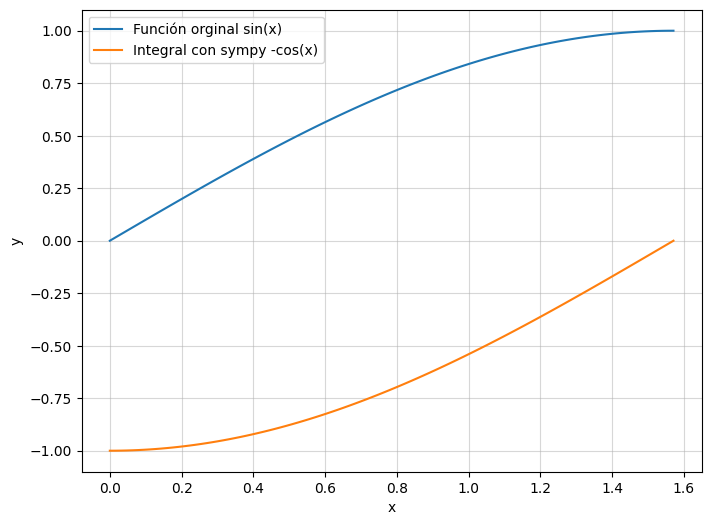

In [35]:
# Integral indefinida con sympy
integral_indefinida_sympy = integrate(funcion_seno_sympy).doit()
integral_indefinida_sympy_to_numpy = lambdify(t, integral_indefinida_sympy, 'numpy')

# Como scipy es una librería numérica, creo que realmente no hay un método para calcular la integral indefinida con scipy

x = np.linspace(0, np.pi/2, 100)
plt.figure(figsize=(8, 6))
plt.plot(x, seno(x), label='Función orginal sin(x)')
plt.plot(x, integral_indefinida_sympy_to_numpy(x), label='Integral con sympy -cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

**2** Considere el código de eliminación gaussiana de clase. (**2.5pts**)

**a)** Modifíquelo para encontrar la factorización PLU de una matriz general, tenga en cuenta que el código ya entrega la matriz U y solo es necesario crear L con las operaciones realizadas. (**1.5pts**)

**b)** Aplíquelo a M2 = np.array([[2.,1.,3],[-1.,2,-1],[3,1,1]]) (**0.5pts**)

**c)** Compruebe la salida con scipy. (import scipy.linalg as LA)  (**1.0pts**)


**Definición**

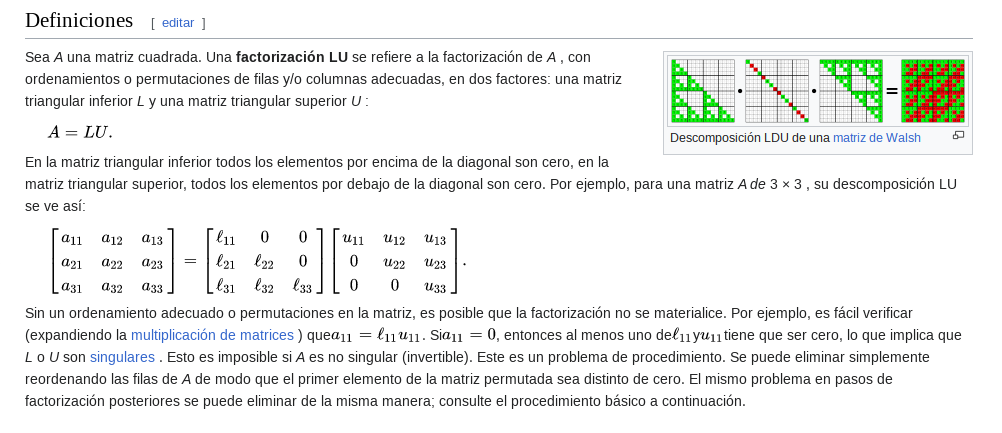

**Ejemplo**

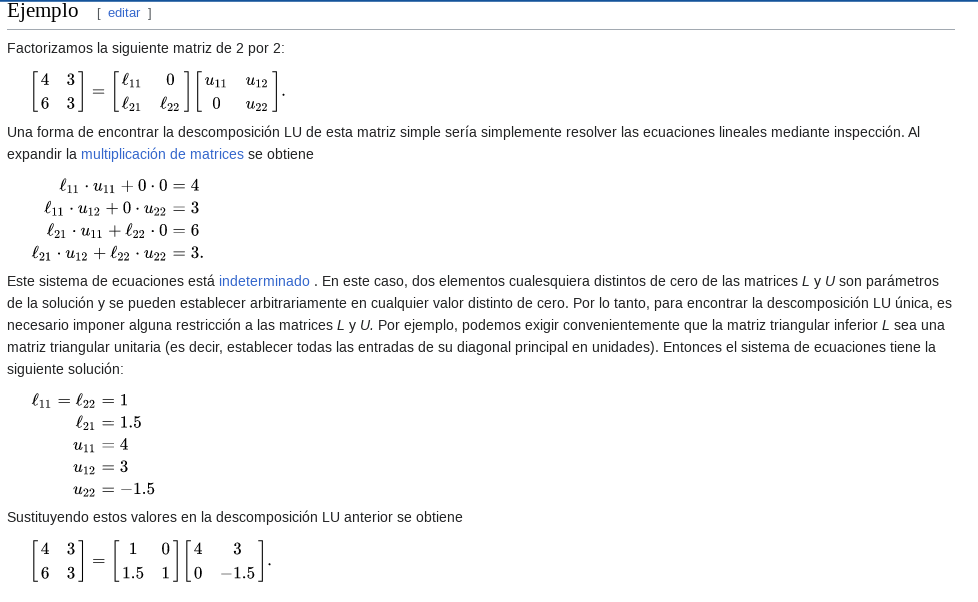

In [36]:
import numpy as np

def row_lamb(i, lamb, A):
    """Multiplica la fila i por un factor lambda en la matriz A."""
    A[i] *= lamb
    return A

def row_comb(i, j, lamb, A):
    """Combina la fila i con la fila j multiplicada por un factor lambda en la matriz A."""
    A[i] -= lamb * A[j]
    return A

def row_swap(i, j, A):
    """Intercambia las filas i y j de la matriz A."""
    A[[i, j]] = A[[j, i]]
    return A

def Gaussian_Elimination_LU(A0):
    # Making local copy of matrix
    A = np.copy(A0)
    # Detecting size of matrix
    n = len(A)
    # Initialize L as an identity matrix
    L = np.eye(n)

    # Sweeping all the columns in order to eliminate coefficients of the i-th variable
    for i in range(0, n):
        # Sweeping all the rows for the i-th column in order to find the first non-zero coefficient
        for j in range(i, n):
            if A[j, i] != 0:
                # Normalization coefficient
                Norm = 1.0 * A[j, i]
                break

        # Applying swap operation to put the non-zero coefficient in the i-th row
        A = row_swap(i, j, A)

        # Eliminating the coefficient associated to the i-th variable
        for j in range(i + 1, n):
            factor = A[j, i] / Norm
            A = row_comb(j, i, factor, A)
            # Store the multiplier in L
            L[j, i] = factor

    # The LU decomposition is now (L, A)
    return (L, A)

Sé que es una forma muy mala de hacerlo pero no vine la clase de LU, lo que hice fue rotar la matriz orginal para calcular la triangular inferior y superior con el mismo código.

In [37]:
M1 = np.array([[2.,1.],[-1.,2,]])
print('Demostración de lo que hice en el anterior código:')
print(f'Matriz original:\n {M1}')
print(f'Matriz rotada por la diagonal:\n {np.rot90(M1, 2)}')

Demostración de lo que hice en el anterior código:
Matriz original:
 [[ 2.  1.]
 [-1.  2.]]
Matriz rotada por la diagonal:
 [[ 2. -1.]
 [ 1.  2.]]


Comprobación y solución:

In [38]:
M2 = np.array([[2.,1.,3],[-1.,2,-1],[3,1,1]], dtype=float)

In [41]:
print('Matrices LU con el código proporcionado')
triangular_sup_codigo = Gaussian_Elimination_LU(M1)[1]
triangular_inf_codigo = Gaussian_Elimination_LU(M1)[0]
print(f'Matriz triangular superior: \n{triangular_sup_codigo}\n')
print(f'Matriz triangular inferior: \n{triangular_inf_codigo}')

Matrices LU con el código proporcionado
Matriz triangular superior: 
[[2.  1. ]
 [0.  2.5]]

Matriz triangular inferior: 
[[ 1.   0. ]
 [-0.5  1. ]]


In [42]:
import scipy.linalg as LA
print('Matrices LU con scipy')
triangular_inferior = LA.lu(M1)[1:3][0]
triangular_superior = LA.lu(M1)[1:3][1]
print(f'Matriz triangular superior: \n{triangular_superior}')
print(f'Matriz triangular inferior: \n{triangular_inferior}\n')

Matrices LU con scipy
Matriz triangular superior: 
[[2.  1. ]
 [0.  2.5]]
Matriz triangular inferior: 
[[ 1.   0. ]
 [-0.5  1. ]]



Aunque no da lo mismo, tampoco la matriz A que se supone que es la que debería dar el código concuerda con la matriz entregada por scipy. Creo que hay un problema en el código para calcular la triangular inferior